# {TITLE}

{Author} and the HERA Validation Team

<h3 id="tocheading">Table of Contents</h3>
<div id="toc"></div>

{We recommend installing jupyter_contrib_nbextensions and enabling the Table of Contents(2) extension, at which point this section can be removed, as it will be generated automatically.  The simplest way of doing this is ``conda install -c conda-forge jupyter_contrib_nbextensions``. To enable the extension, either go to ``localhost:xxxx/nbextensions`` and switch it on, or use ``jupyter nbextension enable toc2/main``. You'll also need to switch on the option to "Add a Table of Contents cell at the top of the notebook". Then delet this and the following javascript cell. 

If you don't want to install this, then leave the heading and javascript here, and execute the JS cell right before submitting the notebook.
}

In [10]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Setup and Metadata

### Abstract

{Brief abstract with high-level discussion of goals.}

### Imports

In [101]:
%matplotlib inline
# import matplotlib.pyplot as plt
import numpy as np
import os, sys, copy
import glob
from datetime import datetime

from hera_cal.io import HERAData
from pyuvdata import UVData, UVCal, utils
from matplotlib.pyplot import *

In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

In [102]:
def waterfall_column(waterfalls, flags, titles, clims=None, clabels=None, cmaps=None, ylims=None, 
                     ylabel='JD - 2458098', extents=None, hspace=.1, figsize=(12,6), dpi=100):
    '''Useful plotting function for the IDR 2.2 memo.'''
    if clims is None:
        clims = [None for i in range(len(waterfalls))]
    if clabels is None:
        clabels = [None for i in range(len(waterfalls))]
    if cmaps is None:
        cmaps = [None for i in range(len(waterfalls))]
    if ylims is None:
        ylims = [None for i in range(len(waterfalls))]
    if not any(isinstance(ex, list) for ex in extents):
        extents = [extents for i in range(len(waterfalls))]

    fig, axes = subplots(len(waterfalls), 1, sharex=True, squeeze=True, figsize=figsize, dpi=dpi)
    subplots_adjust(hspace=hspace)
    for ax, wf, f, t, clim, clabel, cmap, ylim, ex in zip(axes, waterfalls, flags, titles,
                                                          clims, clabels, cmaps, ylims, extents):
        with np.errstate(divide='ignore', invalid='ignore'):
            im = ax.imshow(wf / ~f, aspect='auto', extent=ex, cmap=cmap)
        colorbar(im, ax=ax, label=clabel, aspect=8, pad=.025)
        if ax == axes[-1]:
            ax.set_xlabel('Frequency (MHz)')    
        im.set_clim(clim)
        ax.set_ylabel(ylabel)
        ax.set_ylim(ylim)
        props = dict(boxstyle='round', facecolor='white', alpha=0.8)
        ax.text(0.02, 0.9, t, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

### Description

In [2]:
print("Last executed: %s"%str(datetime.now()))

Last executed: 2019-10-21 09:54:59.480968


{If you installed the ``jupyter_contrib_nbextensions``, then enable the "Python Markdown" extension, remove the line above, and keep the following line. Otherwise, remove the following line and keep the line above.}

Last executed: {str(datetime.now())}

- **Major Step Description:** {Insert standard description of major step}
- **Minor Variation Description:** {Insert standard description of minor step}
- **Pipelines Tested:** {Brief list of explicit pipelines tested in the notebook}
- **Criteria**:
  1. {Explicit Criterion for success 1}
  2. {Explicit Criterion for success 2}
  

### Summary

The results of this validation test, in reference to the outlined criteria, are
1. {Test results for criteria 1}
2. {Test results for criteria 2...}

{Brief notes on anything else interesting that was noted during testing}

### Software

HERA software used in this validation test, with associate git commit hash:

* {``pyuvdata``: `a8f6b6fdd7261`}
* {If you have the Python Markdown extension, you can do this: ``pyuvdata``: ``{pyuvdata.version.git_hash}``
* {``hera_qm``: `f3e32c3cef36cbd`}
* {etc.}

Versions of other software used in this validation test:

* {``numpy``: vx.x.x}
* {etc. (only list imported modules).}

### Data

The following paths reflect the exact locations of all data used in this test:

In [5]:
data_path = "/lustre/aoc/projects/hera/Validation/"
eor_filename = "hera_hex37_100-200MHz_HERA_dipole_beam_pow_neg2_pspec/realization_0.uvh5"
egsm_filename = "hera_hex37_100-200MHz_HERA_dipole_eGSM_preview/hera_hex37_egsm_preview.uvh5"
gleam_filename = "hera_hex37_100-200MHz_HERA_dipole_full_gleam_plus_brights_v01/hera_hex37_full_gleam_plus_brights_v01.uvh5"

#### Individual sources

In [6]:
bl = (12, 13, 'xx')
hd_eor = HERAData(os.path.join(data_path, eor_filename))
hd_egsm = HERAData(os.path.join(data_path, egsm_filename))
hd_gleam = HERAData(os.path.join(data_path, gleam_filename))

Telescope RIMEz calculation is not in known_telescopes.
Telescope RIMEz calculation is not in known_telescopes.


In [7]:
data_eor, flags_eor, nsamples_eor = hd_eor.read(bls=[bl])
data_egsm, flags_egsm, nsamples_egsm = hd_egsm.read(bls=[bl])
data_gleam, flags_gleam, nsamples_gleam = hd_gleam.read(bls=[bl])

#### Combined sources

In [32]:
uvd_eor = UVData()
uvd_eor.read(os.path.join(data_path, eor_filename))

uvd_egsm = UVData()
uvd_egsm.read(os.path.join(data_path, egsm_filename))

uvd_gleam = UVData()
uvd_gleam.read(os.path.join(data_path, gleam_filename))

Telescope RIMEz calculation is not in known_telescopes.


In [33]:
uvd = copy.deepcopy(uvd_eor)

uvd.data_array += uvd_egsm.data_array + uvd_gleam.data_array

In [35]:
uvd.data_array += uvd_egsm.data_array + uvd_gleam.data_array

In [45]:
uvd.history += '  Sum of {}, {}, and {} from {}.'.format(eor_filename, egsm_filename, gleam_filename, data_path)
out_dir = '/lustre/aoc/projects/hera/Validation/test-3.1.0'
filename = 'hera_hex37_100-200MHz_HERA_dipole_beam_pow_neg2_pspec_realization_0_plus_egsm_and_gleam.uvh5'
uvd.write_uvh5(os.path.join(out_dir, filename), clobber=True)

File exists; clobbering


In [57]:
data, flags = uvd.get_data(bl), uvd.get_flags(bl)

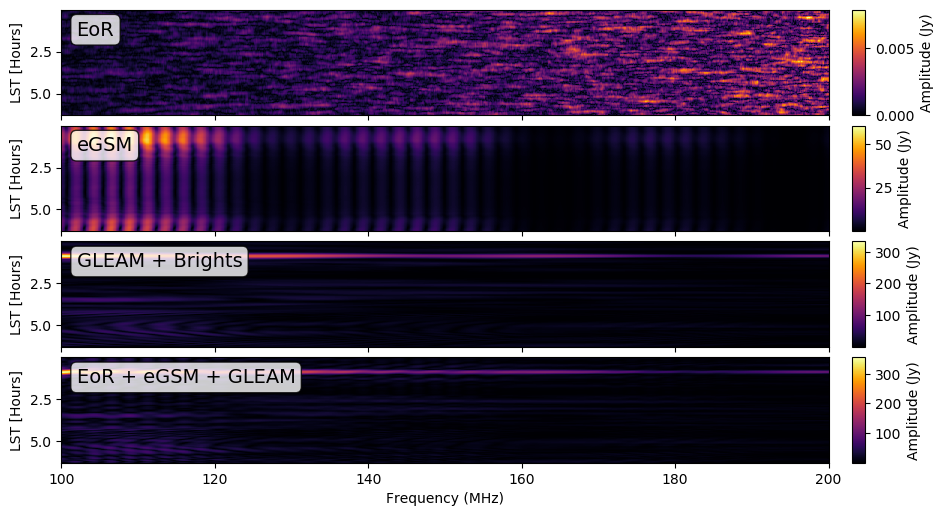

In [105]:
extent = [hd_eor.freqs[0] / 1e6, hd_eor.freqs[-1] / 1e6, hd_eor.lst_array[-1], hd_eor.lst_array[0]]
waterfall_column([np.abs(data_eor[bl]), np.abs(data_egsm[bl]), np.abs(data_gleam[bl]), np.abs(data)],
                 [flags_eor[bl], flags_egsm[bl], flags_gleam[bl], flags],
                 ['EoR', 'eGSM', 'GLEAM + Brights', 'EoR + eGSM + GLEAM'],
                 clabels = ['Amplitude (Jy)'] * 4,
                 cmaps = ['inferno'] * 4,
                 ylabel = 'LST [Hours]',
                 extents=extent)

### Flags

In [90]:
lst_duration_hours = uvd.lst_array.max() - uvd.lst_array.min()
lst_per_file = 10.7 / 60 # hours of LST
nrfi_files = np.ceil(lst_duration_hours / lst_per_file)
print(nrfi_files)

36.0


In [72]:
!du -sh $idr2_data_path/zen.2458101.12552.HH.smooth_abs.calfits
!du -sh $idr2_data_path/zen.2458101.12552.HH.OCRSD.uvh5

196M	/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458101/zen.2458101.12552.HH.smooth_abs.calfits
5.1G	/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458101/zen.2458101.12552.HH.OCRSD.uvh5


In [119]:
idr2_data_path = '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458101'
rfi_filenames = sorted(glob.glob(os.path.join(idr2_data_path, 'zen.???????.?????.HH.OCRSD.uvh5')))
print(rfi_filenames)

['/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458101/zen.2458101.12552.HH.OCRSD.uvh5', '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458101/zen.2458101.13298.HH.OCRSD.uvh5', '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458101/zen.2458101.14043.HH.OCRSD.uvh5', '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458101/zen.2458101.14789.HH.OCRSD.uvh5', '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458101/zen.2458101.15535.HH.OCRSD.uvh5', '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458101/zen.2458101.16280.HH.OCRSD.uvh5', '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458101/zen.2458101.17026.HH.OCRSD.uvh5', '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458101/zen.2458101.17772.HH.OCRSD.uvh5', '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458101/zen.2458101.18517.HH.OCRSD.uvh5', '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458101/zen.2458101.19263.HH.OCRSD.uvh5', '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458101/zen.2458101.20009.HH.OCRSD.uvh5', '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458101/zen.2458101.2

In [ ]:
rfi_arr_list = []
bl_arr_list = []
for i_file, rfi_filename in enumerate(rfi_filenames):
    print(i_file, end=', ')
    uvd_rfi = UVData()
    uvd_rfi.read(rfi_filename)
    # only pull flags from non fully flagged baselines
    good_bls = []
    antpairs = np.array(uvd_rfi.baseline_to_antnums(np.unique(uvd_rfi.baseline_array))).T
    for bl in antpairs:
        flags = uvd_rfi.get_flags(bl)
        if np.sum(flags) < flags.size:
            good_bls.append(tuple(bl))
    if len(good_bls) > 0:
        uvd_rfi.select(bls=good_bls)
        rfi_arr_list.append(uvd_rfi.flag_array)
        bl_arr_list.append(uvd_rfi.baseline_array)
    del(uvd_rfi)


out_dic = {}
out_dic['flags'] = rfi_arr_list
out_dic['baseline_array'] = bl_arr_list

np.save('./flags_and_bl_array_dic', out_dic)

0, 1, 2, 3, 4, 

In [133]:
uvd_rfi = UVData()
uvd_rfi.read('/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458101/zen.2458101.53563.HH.OCRSD.uvh5')

In [149]:
good_bls = []
antpairs = np.array(uvd_rfi.baseline_to_antnums(np.unique(uvd_rfi.baseline_array))).T
for bl in antpairs:
    flags = uvd_rfi.get_flags(bl)
    if np.sum(flags) < flags.size:
        good_bls.append(tuple(bl))

In [145]:
tuple(bl)

(143, 143)

In [140]:
np.sum(flags), flags.size

(106856, 245760)

In [150]:
good_bls

[]

## {First Working Section Title}

{Put any desciptions etc. here and do your tests!}

{Here is an example image with an associated figure caption. Try to remember to use a semi-colon at the end of the code cell so that only the figure is shown.}

Text(0.5,1.05,'(24, 25) Noise Amplitude [Jy]')

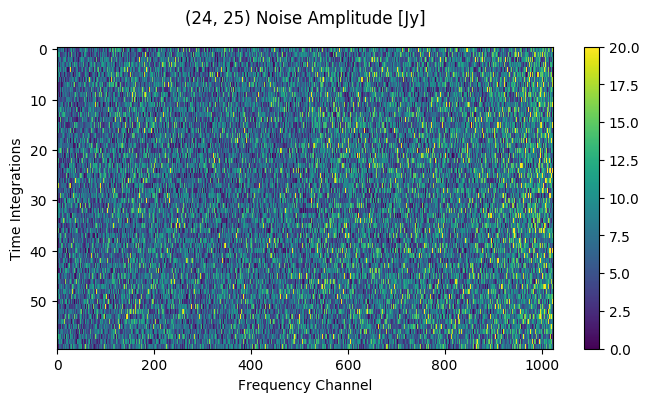

In [6]:
# plot simulated noise amplitude waterfall
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)

bl = (24, 25)
cax = ax.matshow(np.abs(uvn1.get_data(bl)), vmin=0, vmax=20, aspect='auto')
cbar = fig.colorbar(cax, ax=ax)
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel("Frequency Channel", fontsize=10)
ax.set_ylabel("Time Integrations", fontsize=10)
ax.set_title("{} Noise Amplitude [Jy]".format(bl));

**Figure 1** | This is the real component of a simulated noise waterfall for a 10-minute file.
